In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset with a different encoding
df = pd.read_csv('5-sales_data_sample.csv', encoding ="unicode_escape")
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
df = df.dropna()

In [4]:
# Select numerical columns for clustering
# Assume we are clustering based on 'SALES', 'QUANTITYORDERED', 'PRICEEACH'

X = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## The Elbow Method in K-Means Clustering

The **Elbow Method** is a technique used to determine the optimal number of clusters in *K-Means Clustering*, an unsupervised learning algorithm often used for data segmentation.

### How the Elbow Method Works

1. **Choose a range of values for $ k $**: Run the K-Means clustering algorithm multiple times, each time with a different number of clusters \( k \), usually starting from $ k=1 $ up to a larger number (like 10 or 20).

2. **Calculate the Within-Cluster Sum of Squares (WCSS)** for each value of $ k $: The WCSS measures the total variance within each cluster. For each cluster, this is the sum of squared distances between each point and the centroid of the cluster. Lower WCSS values indicate that points are closer to their cluster centroids, which is generally desirable.

 
   $$ \text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2 $$
   

   where:
   - $ k $ is the number of clusters,
   - $ C_i $ represents each cluster,
   - $ x $ is a data point in cluster $ C_i $, and
   - $ \mu_i $ is the centroid of cluster $ C_i $.

3. **Plot $ k $ vs. WCSS**: As $ k $ increases, WCSS typically decreases (as more clusters can better "fit" the data points within each cluster). However, after a certain point, the marginal decrease in WCSS becomes minimal.

4. **Identify the "Elbow" Point**: Look for a point on the plot where the rate of decrease sharply slows down, creating an "elbow" shape. The location of this "elbow" is considered the optimal number of clusters, as increasing $ k $ beyond this point results in diminishing returns in terms of improved cluster compactness.

### Why the Elbow Point is Optimal

The elbow point indicates a balance between two competing factors:
   - **Minimizing WCSS**: Having well-defined clusters where points are close to their centroids.
   - **Avoiding Overfitting**: Not having so many clusters that the model starts to "overfit" the natural groupings in the data.

Choosing $ k $ at the elbow helps achieve meaningful clustering while maintaining model simplicity.

### Inertia in K-Means Clustering

In the context of K-Means clustering and the Elbow Method, **inertia** is another term for the *Within-Cluster Sum of Squares (WCSS)*. It represents how well the clusters formed by the K-Means algorithm fit the data points. Specifically, inertia measures the sum of squared distances between each data point and the centroid of the cluster to which it has been assigned.

In [6]:
from sklearn.cluster import KMeans
help(KMeans)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' 

In [8]:



inertia = []
K = range(1, 11)


for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



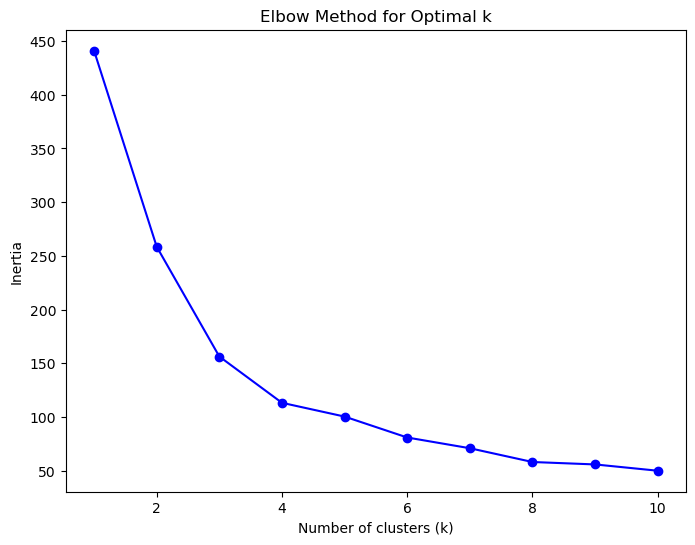

In [9]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.title('Elbow Method for Optimal k')
plt.show()

## Plot formatting: `'bo-'`

This is matplotlib's format string shorthand:
- **`b`** = blue color
- **`o`** = circle markers at data points
- **`-`** = solid line connecting the points

So `'bo-'` gives you a blue line with circular markers. You could use `'rx--'` for red x-markers with dashed lines, etc.

## Inertia

**Inertia** is the sum of squared distances from each point to its assigned cluster center:

**Inertia = Σ ||xᵢ - cⱼ||²**

where xᵢ is a data point and cⱼ is its cluster center.

Lower inertia = points are closer to their cluster centers = tighter clusters.

## The Elbow Method

As you increase k (number of clusters), inertia always decreases (more clusters = better fit). But you want the **sweet spot** where adding more clusters doesn't help much.

Plot inertia vs k. Look for the "elbow" - the point where the curve bends sharply. Before the elbow, each new cluster significantly reduces inertia. After the elbow, you're just overfitting.

Example: If inertia drops dramatically from k=1 to k=3, then flattens out, k=3 is likely your optimal number of clusters.

In [10]:
# Choose k based on elbow point (e.g., k=4)
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster assignments
df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'Cluster']]

/tmp/ipykernel_488269/3114978266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X_scaled)


,SALES,QUANTITYORDERED,PRICEEACH,Cluster
10,3965.66,37,100.00,2
21,1451.00,20,72.55,0
40,4905.39,21,100.00,2
47,3944.70,30,100.00,2
51,2416.56,24,100.00,2
...,...,...,...,...
2667,3268.00,43,76.00,3
2673,1747.20,26,67.20,0
2685,5001.92,44,100.00,1
2764,4277.35,35,100.00,2
